# **MIDTERM PROJECT VISDAT**

**Hanvito Michael Lee (1301190090)**


In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [24]:
!gdown --id 1nWcdNzhXAp87PkjsGmv0rYJzopMzgs58
!gdown --id 1O4aaN2tLLhGwiRpjEhiMCovpQqQMP4JC

Downloading...
From: https://drive.google.com/uc?id=1nWcdNzhXAp87PkjsGmv0rYJzopMzgs58
To: /content/Data_Set_1.csv
100% 1.15k/1.15k [00:00<00:00, 1.78MB/s]
Downloading...
From: https://drive.google.com/uc?id=1O4aaN2tLLhGwiRpjEhiMCovpQqQMP4JC
To: /content/Data_Set_2.csv
100% 2.82k/2.82k [00:00<00:00, 4.74MB/s]


# Dataset 1

Data set ini terdiri dari data historis terkait dengan kasus COVID-19 di Indonesia pada 
periode 2 – 31 Maret 2020. Data historis yang tersedia di antaranya jumlah akumulatif 
tes sampel, terkonfirmasi positif, terkonfirmasi negatif, dan data lainnya. 

**Data Understanding**


In [25]:
df1 = pd.read_csv('Data_Set_1.csv')
df1.head()

,date,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated
0,02-Mar-20,339,339,2,2,335,2,2
1,03-Mar-20,2,341,0,2,337,2,2
2,04-Mar-20,31,372,0,2,356,14,2
3,05-Mar-20,16,388,0,2,371,15,2
4,06-Mar-20,62,450,2,4,422,24,4


In [26]:
df1.isnull().sum()

date             0
new_tested       0
acc_tested       0
new_confirmed    0
acc_confirmed    0
acc_negative     0
being_checked    0
isolated         0
dtype: int64

In [27]:
df1.describe()

,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,229.233333,2275.300000,50.933333,398.933333,1875.000000,13.000000,346.266667
std,281.828229,2153.042645,48.962993,480.433923,1680.618954,11.110728,414.461673
min,2.000000,339.000000,0.000000,2.000000,335.000000,0.000000,2.000000
25%,63.750000,580.750000,3.250000,21.000000,527.250000,0.000000,21.000000
50%,136.000000,1351.000000,36.500000,153.000000,1230.500000,15.000000,138.500000
75%,315.000000,3188.000000,97.750000,658.500000,2513.000000,20.000000,575.000000
max,1439.000000,6777.000000,153.000000,1528.000000,5249.000000,37.000000,1311.000000


In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           30 non-null     object
 1   new_tested     30 non-null     int64 
 2   acc_tested     30 non-null     int64 
 3   new_confirmed  30 non-null     int64 
 4   acc_confirmed  30 non-null     int64 
 5   acc_negative   30 non-null     int64 
 6   being_checked  30 non-null     int64 
 7   isolated       30 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 2.0+ KB


#**Soal 1**

Dengan menggunakan line plot, tampilkan perbandingan jumlah akumulatif tes sampel, terkonfirmasi positif dan terkonfirmasi negatif untuk periode waktu yang tersedia.

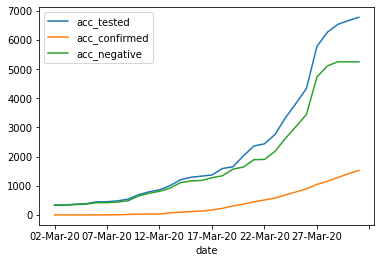

In [29]:
df1.plot(x="date", y=["acc_tested", "acc_confirmed", "acc_negative"])
plt.show()

#**Soal 2**
• Hitunglah nilai positive rate dan negative rate untuk masing-masing waktu.

• Dengan menggunakan bar plot, tampilkan perbandingan positivity rate dan 
negativity rate untuk periode waktu yang tersedia.

• Pada tanggal berapa nilai positive rate menunjukkan nilai tertinggi?

• Pada tanggal berapa nilai negative rate menunjukkan nilai tertinggi?

In [30]:
df1['Positive_Rate'] = df1['acc_confirmed'] / df1['acc_tested'] * 100
df1['Negative_Rate'] = df1['acc_negative'] / df1['acc_tested'] * 100
df1.head()

,date,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated,Positive_Rate,Negative_Rate
0,02-Mar-20,339,339,2,2,335,2,2,0.589971,98.820059
1,03-Mar-20,2,341,0,2,337,2,2,0.586510,98.826979
2,04-Mar-20,31,372,0,2,356,14,2,0.537634,95.698925
3,05-Mar-20,16,388,0,2,371,15,2,0.515464,95.618557
4,06-Mar-20,62,450,2,4,422,24,4,0.888889,93.777778


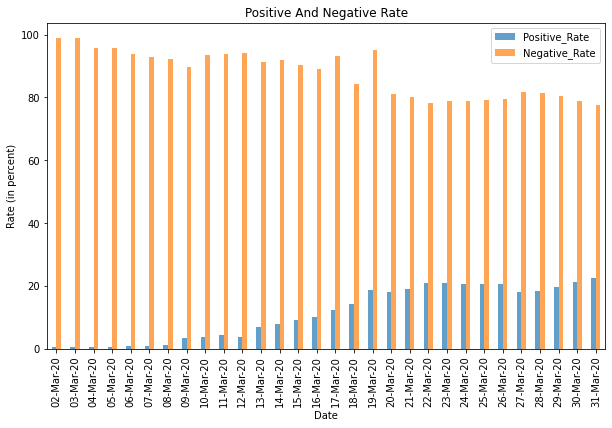

In [31]:
df1.plot(x="date", y=["Positive_Rate", "Negative_Rate"],
          kind ='bar', 
          figsize=(10, 6),
          alpha=0.7,
         )

plt.title('Positive And Negative Rate')
plt.ylabel('Rate (in percent)')
plt.xlabel('Date')

plt.show()

In [32]:
max_positive = df1['Positive_Rate'].max()
df1.loc[df1['Positive_Rate'] == max_positive, 'date']

29    31-Mar-20
Name: date, dtype: object

***Jawaban***

Terlihat bahwa nilai positive rate tertinggi terjadi pada tanggal 31-Maret-20 Seperti yang terlihat pada barplot. Statement ini didukung juga dengan pencarian nilai maksimum pada kolom Positive Rate yang menghasilkan tanggal 31-Mar-2020 Sebagai Outputnya.


In [33]:
max_negative = df1['Negative_Rate'].max()
df1.loc[df1['Negative_Rate'] == max_negative, 'date']

1    03-Mar-20
Name: date, dtype: object

***Jawaban***

Terlihat bahwa nilai negative rate tertinggi terjadi pada tanggal 3-Maret-20 Seperti yang terlihat pada barplot. Statement ini didukung juga dengan pencarian nilai maksimum pada kolom Negative Rate yang menghasilkan tanggal 3-Mar-20 Sebagai Outputnya.

# **Soal 3**

• Dengan menggunakan heatmap, tunjukkan korelasi antar variabel yang ada pada 
dataset.

• Tentukan variabel-variabel yang memiliki nilai korelasi paling positif, dan berikan 
penjelasan terkait nilai korelasi tersebut.

• Tentukan variabel-variabel yang memiliki nilai korelasi paling negatif, dan berikan 
penjelasan terkait nilai korelasi tersebut

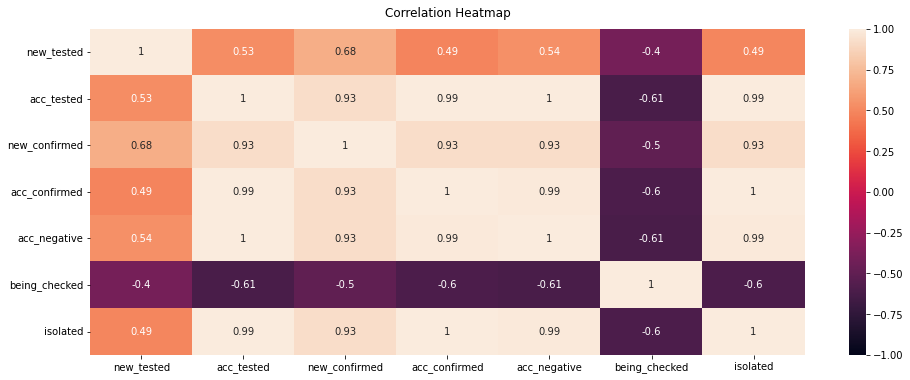

In [34]:
df1 = df1.drop(['Positive_Rate', 'Negative_Rate'], axis=1)

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

**Jawaban**

*Variabel-variabel yang memiliki korelasi positive paling tinggi*

1. acc_negative -- acc_tested dengan korelasi 1 yang artinya ketika acc_tested bertambah maka acc_negative juga akan bertambah. Begitupun sebaliknya.
2. isolated -- acc_confirmed dengan korelasi 1 yang artinya ketika acc confirmed bertambah maka isolated juga akan bertambah.

*Variabel-variabel yang memiliki korelasi negative paling tinggi*

1. being_checked -- acc_tested dengan nilai korelasi -0.61. nilai acc tested bertolak belakang dengan nilai being-checked.
2. being_checked -- acc_negative dengan nilai korelasi -0.61. Nilai acc negative dengan nilai being_checked berbanding terbalik.

#**Dataset 2**

Data set ini menyajikan data spasial terkait kasus COVID-19 di masing-masing provinsi 
di Indonesia. Data yang disajikan di antaranya jumlah populasi, jumlah kasus positif, dan 
lain-lain

**Data Understanding**

In [35]:
df2 = pd.read_csv('Data_Set_2.csv')
df2.head()

,province_id,province_name,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude
0,1,Aceh,Sumatra,AC,Banda Aceh,4906835,86,4,0,0,9.672.895,3.869.994
1,2,Bali,Kepulauan Nusa Tenggara,BA,Denpasar,4104900,738,9,2,0,11.512.255,-825.731
2,3,Banten,Jawa,BT,Serang,11704877,1298,84,4,1,106.160.889,-6.315.299
3,4,Bengkulu,Sumatra,BE,Bengkulu,1844800,93,0,0,0,102.315.674,-3.414.725
4,5,DI Yogyakarta,Jawa,YO,Yogyakarta,3553100,1134,22,2,1,110.390.625,-7.863.382


In [36]:
df2.isnull().sum()

province_id            0
province_name          0
island                 0
iso_code               0
capital_city           0
population             0
population_kmsquare    0
confirmed              0
deceased               0
released               0
longitude              0
latitude               0
dtype: int64

In [37]:
df2.describe()

,province_id,population,population_kmsquare,confirmed,deceased,released
count,34.000000,3.400000e+01,34.000000,34.000000,34.000000,34.000000
mean,17.500000,7.412293e+06,297.558824,29.911765,2.529412,1.352941
std,9.958246,1.068707e+07,427.403733,103.257069,8.975506,5.476575
min,1.000000,6.183840e+05,2.000000,0.000000,0.000000,0.000000
25%,9.250000,2.034712e+06,47.250000,1.000000,0.000000,0.000000
50%,17.500000,3.737945e+06,93.000000,3.500000,0.000000,0.000000
75%,25.750000,7.503236e+06,234.500000,8.750000,1.000000,0.000000
max,34.000000,4.602967e+07,1353.000000,598.000000,51.000000,31.000000


In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   province_id          34 non-null     int64 
 1   province_name        34 non-null     object
 2   island               34 non-null     object
 3   iso_code             34 non-null     object
 4   capital_city         34 non-null     object
 5   population           34 non-null     int64 
 6   population_kmsquare  34 non-null     int64 
 7   confirmed            34 non-null     int64 
 8   deceased             34 non-null     int64 
 9   released             34 non-null     int64 
 10  longitude            34 non-null     object
 11  latitude             34 non-null     object
dtypes: int64(6), object(6)
memory usage: 3.3+ KB


#Soal 4

• Hitunglah nilai persentase perbandingan jumlah terkonfirmasi positif terhadap 
populasi per km2 untuk masing-masing provinsi.

• Dengan menggunakan bar plot, tampilkan perbandingan nilai persentase tersebut 
untuk masing-masing provinsi.

• Tampilkan 3 provinsi dengan nilai persentasi terbesar beserta nilai persentasenya.

In [39]:
df2.head()

,province_id,province_name,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude
0,1,Aceh,Sumatra,AC,Banda Aceh,4906835,86,4,0,0,9.672.895,3.869.994
1,2,Bali,Kepulauan Nusa Tenggara,BA,Denpasar,4104900,738,9,2,0,11.512.255,-825.731
2,3,Banten,Jawa,BT,Serang,11704877,1298,84,4,1,106.160.889,-6.315.299
3,4,Bengkulu,Sumatra,BE,Bengkulu,1844800,93,0,0,0,102.315.674,-3.414.725
4,5,DI Yogyakarta,Jawa,YO,Yogyakarta,3553100,1134,22,2,1,110.390.625,-7.863.382


In [40]:
df2['Positive_Rate'] = df2['confirmed'] / df2['population_kmsquare'] * 100
df2.head()

,province_id,province_name,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude,Positive_Rate
0,1,Aceh,Sumatra,AC,Banda Aceh,4906835,86,4,0,0,9.672.895,3.869.994,4.651163
1,2,Bali,Kepulauan Nusa Tenggara,BA,Denpasar,4104900,738,9,2,0,11.512.255,-825.731,1.219512
2,3,Banten,Jawa,BT,Serang,11704877,1298,84,4,1,106.160.889,-6.315.299,6.471495
3,4,Bengkulu,Sumatra,BE,Bengkulu,1844800,93,0,0,0,102.315.674,-3.414.725,0.000000
4,5,DI Yogyakarta,Jawa,YO,Yogyakarta,3553100,1134,22,2,1,110.390.625,-7.863.382,1.940035


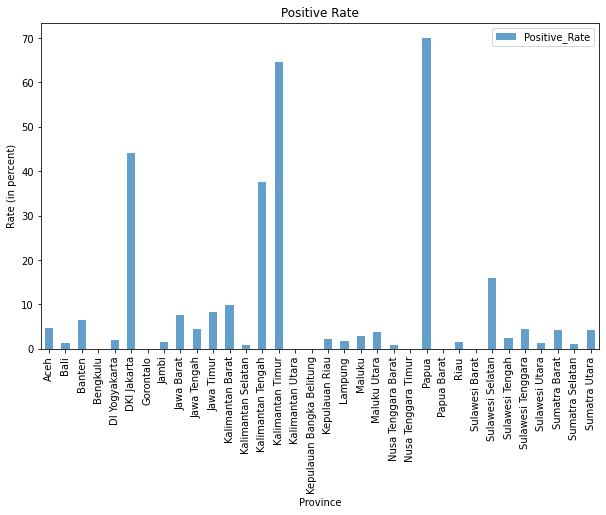

In [41]:
df2.plot(x="province_name", y="Positive_Rate",
          kind ='bar', 
          figsize=(10, 6),
          alpha=0.7,
         )

plt.title('Positive Rate')
plt.ylabel('Rate (in percent)')
plt.xlabel('Province')

plt.show()

In [42]:
df2_t = df2[['province_name', 'Positive_Rate']].sort_values(by = ['Positive_Rate'], ascending = False)
df2_t.head(3)

,province_name,Positive_Rate
23,Papua,70.000000
14,Kalimantan Timur,64.705882
5,DKI Jakarta,44.198078


*Jawaban*

Dapat dilihat 3 Provinsi dengan positive rate tertinggi yaitu Papua, Kalimantan Timur, dan DKI Jakarta.


#**Soal 5**

Dengan menggunakan pie chart, tampilkan persentase jumlah terkonfimasi positif untuk 
masing-masing pulau.

<function matplotlib.pyplot.show>

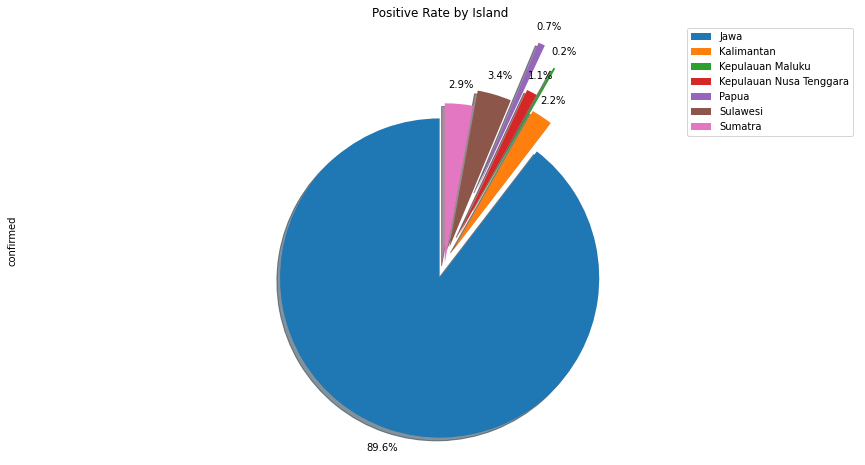

In [44]:
df2_island = df2.groupby('island', axis=0).sum()
myexplode = [0.1, 0.1, 0.4, 0.2,0.5,0.1,0]
df2_island['confirmed'].plot(kind='pie',
                            figsize=(15, 8),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None,
                            pctdistance=1.12,
                            explode=myexplode
                           )

plt.title('Positive Rate by Island', y = 1)
plt.legend(labels=df2_island.index, loc='upper right')
plt.axis('equal')
plt.show